### Simple Linear Regression
Simple Linear Regression is an apporach for predicting a quantitative response Y on the basis of a single predictor variable X. It assumes that there is approximately a linear relationship between X and Y.
<br>
The quality of a linear regression fit is typically assessed using two related quantities: the residual standard error(RSE) and the $R^2$ statistic.
<br>
* RSE is the average amount that the response will deviate from the true regression line.
* RSE is also considered as a measure of lack of fit fo the model to the data.
* $R^2$ is the proportion of variance explained. It always takes on a value between 0 and 1

In [1]:
df = pd.read_csv("Files/Files for Regression/Data/House_Price.csv",header=0)

<IPython.core.display.Javascript object>

In [2]:
df_original = df.copy()

In [3]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
df.shape

(506, 19)

## Univariate Analysis
Univariate analysis is the simplest form of analyzing data. "Uni" means one, so in other words, your data has only one variable. It doesn't deal with causes or relationship (unlike regression) and it's major purpose is to describe; it takes data, summarized that data and finds patterns in the data.

<b> Ways to describe patterns found in univariate data</b>
1. Central Tendency
    1. Mean
    2. Mode
    3. Median
2. Dispersion
    1. Range
    2. Varaince
    3. Max, min
    4. Quartiles inlcuding interquartile range
    5. stddev
    
3. Count/Null Count

In [5]:
df.describe(include='all')

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506,498.000000,506.000000,506,506.000000,506,506.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,4,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN,River,NaN,YES,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,NaN,NaN,183,NaN,506,NaN
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,NaN,7.899767,13.041605,NaN,39.181818,NaN,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,NaN,1.476683,5.238957,NaN,12.513697,NaN,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,NaN,5.268000,10.057600,NaN,3.000000,NaN,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,NaN,6.634500,11.189800,NaN,28.000000,NaN,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,NaN,7.999000,12.720000,NaN,39.000000,NaN,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,NaN,9.088000,14.170800,NaN,50.000000,NaN,0.061397


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

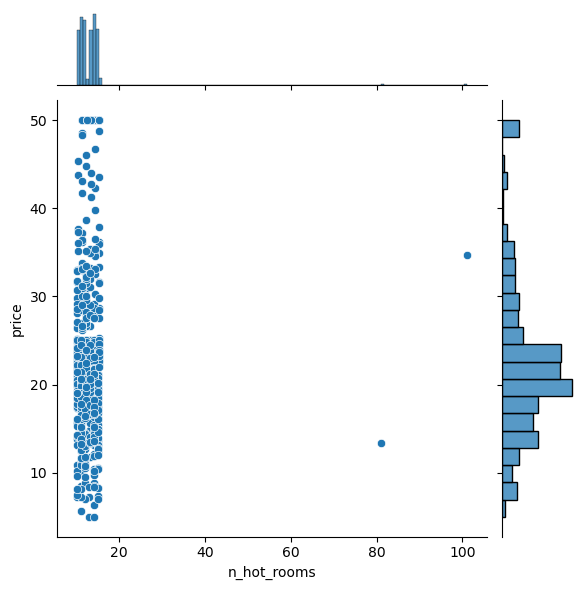

In [6]:
sns.jointplot(x='n_hot_rooms', y = 'price', data = df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

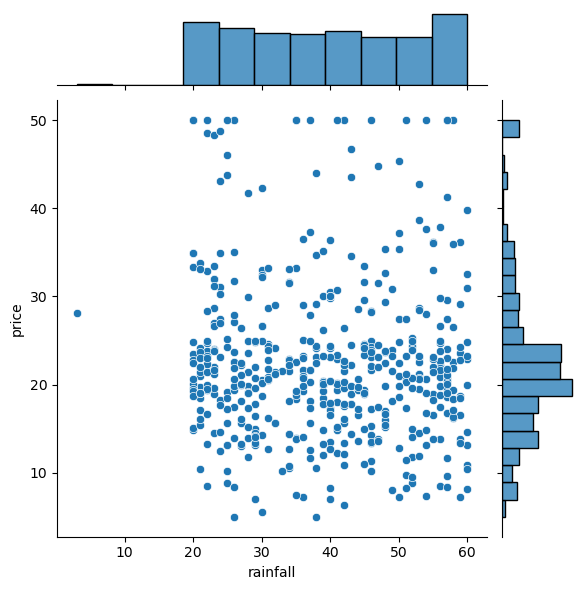

In [7]:
sns.jointplot(x='rainfall', y = 'price', data =df)
plt.show()

## Identify Categorical Columns

In [8]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

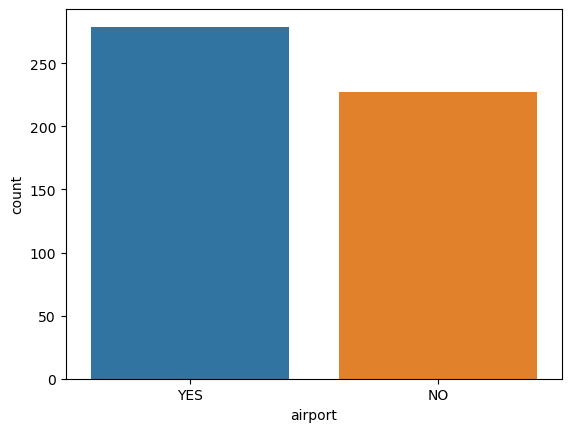

In [9]:
# 1. Airport
sns.countplot(x='airport', data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

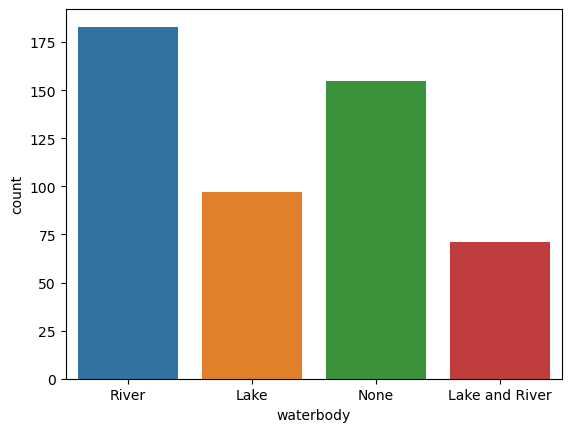

In [10]:
# Waterbody
sns.countplot(x='waterbody', data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

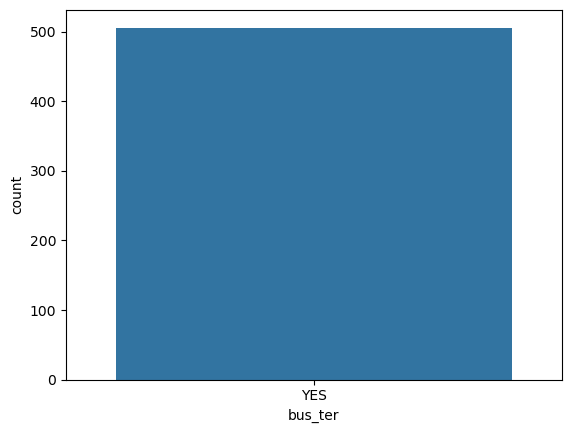

In [11]:
# bus_ter
sns.countplot(x='bus_ter', data=df)
plt.show() # does not impact our labels in any way

### Observations
1. Missing values in n_has_beds
2. Skewness or outliers in crime_rate
3. Ouliers in n_ho_rooms and rainfal
4. Bus terminal has only yes values

## Outlier Treatment
Outlier is an obersvation that appears far away and diverges from an overall pattern in a sample
* It increases the error variance and reduces teh power of statistical tests <br><br>
    ### <b>`Solution`</b> <br><br>
* Detect outliers using EDD and visualization methods such as scatter plot, histogram or box plots
* Impute outliers
* Where there is a huge difference between mean and median, then it means there is an outlier

### Methods of Treatment
#### 1. Capping and Flooring
* Impute all the values above the 3 * p99 and below 0.3 * p1
* Impute with values 3 * p99 and 0.3*p1
* You can use any multiplier instead of 3, as per your business requirement
#### 2. Exponential smoothing
* Extrapolate curve between p95 to p99 and cap all teh values falling outside to the value generated by the curve
* Similaryl, extrapolate curve between p5 and p1
#### 3. Sigma Approach
* Identify outliers by capturing all the values falling outside μ ± xσ
* You can use any multiplier as x, as per the requirements


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [13]:
df.nunique()

price          228
crime_rate     504
resid_area      76
air_qual        81
room_num       446
age            356
dist1          339
dist2          354
dist3          339
dist4          353
teachers        46
poor_prop      455
airport          2
n_hos_beds     454
n_hot_rooms    423
waterbody        4
rainfall        42
bus_ter          1
parks          506
dtype: int64

In [14]:
df.waterbody.unique()

array(['River', 'Lake', 'None', 'Lake and River'], dtype=object)

In [15]:
uv = np.percentile(df.n_hot_rooms, [99])[0]
uv

<IPython.core.display.Javascript object>

15.39952

In [16]:
df[(df.n_hot_rooms > uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [17]:
3*uv

46.19856

In [18]:
df['n_hot_rooms'][(df['n_hot_rooms'] > 3*uv)] = 3 * uv

C:\Users\The Geek Dev\AppData\Local\Temp\ipykernel_1932\2768065575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_hot_rooms'][(df['n_hot_rooms'] > 3*uv)] = 3 * uv


In [19]:
lv = np.percentile(df.rainfall, [1])[0]

<IPython.core.display.Javascript object>

In [20]:
df.rainfall[(df.rainfall < 0.3 * lv)] = 0.3 * lv

C:\Users\The Geek Dev\AppData\Local\Temp\ipykernel_1932\4268105708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3 * lv)] = 0.3 * lv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

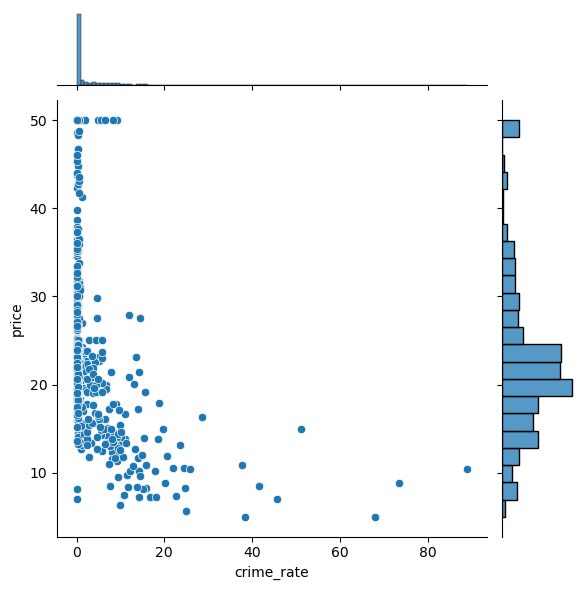

In [21]:
sns.jointplot(x='crime_rate', y='price', data=df)
plt.show()

In [22]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


## Missing Value Imputation
* identify missing values via df.info()<br><br>
<b> Solutions </b> <br>
1. remove rows with missing data from your dataset
2. Impute missing values with mean/median values in your dataset
    1. Impute with zero - impute missing values with zero
    2. Inpute with median/mean/mode
        * For categorical variables, impute missing values with Mode
    3. Segment based imputation
        * Identify relevant segments
        * Calculate mean/median/mode of segments
        * Impute the missing value according to the segment
        


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [24]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Seasonality
Seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly.
#### Reasons
* Weather
* Vacation
* Holidays


### Bivariate Analysis
Bivariate Analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

<b>Scatter Plot</b> <br>
* Scatter indicates the type (linear or non-linear) and strength of the relationship between two variables.
    * Linear
    * Logarithmic
    * Exponential
    * No relationship
* We will use Scatter plot to transform variables.

<b>Correlation</b><br>
* Linear correlation quantifies the strength of a linear relationship between two numerical variables.
* When there is no correlation between two variables, there is no tendency for the values of one quantity to increase or decrease with the values of the second quantity.
* Correlation is used to drop Non Usable Variables

### Variable Transformation
Transform your existing variable to extract more information out of them
<br>
<b>Methods</b> <br>
* Use Mean/Median of variables conveying similar type of information
* Create ratio variable which are more relevant to business.
* Transform variable by taking log, exponential, roots
* *Adding a constant, adding a negative effect*





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

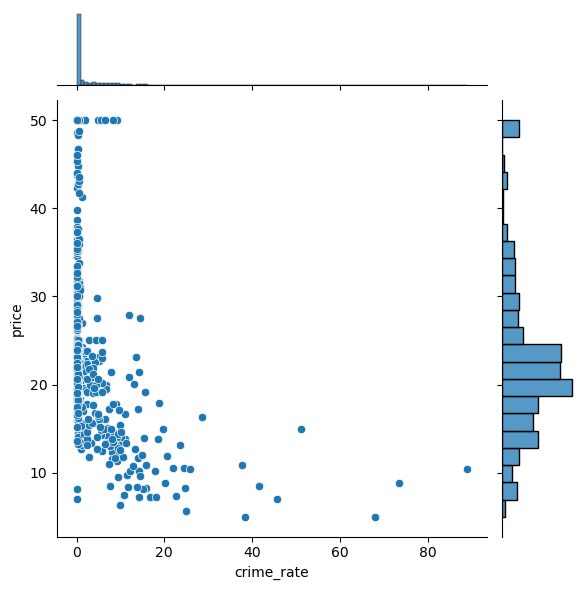

In [26]:
sns.jointplot(x='crime_rate', y='price', data=df)
plt.show()

In [27]:
df.crime_rate = np.log(1+df.crime_rate)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

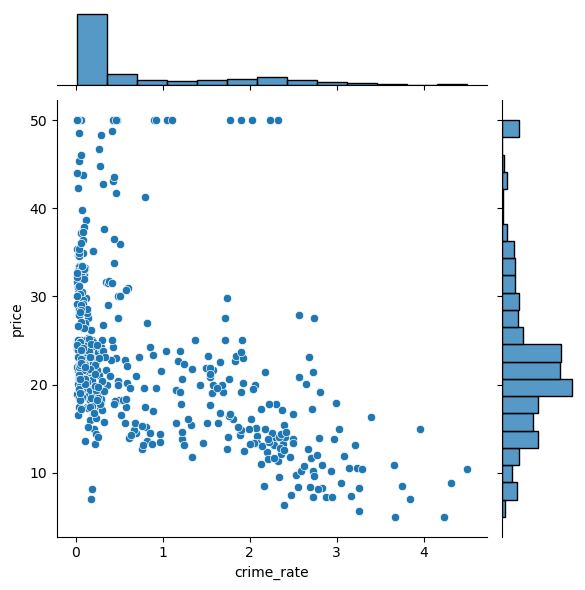

In [28]:
sns.jointplot(x='crime_rate', y='price', data=df)
plt.show()

In [29]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,506.0,22.528854,9.182176,5.000000,17.025000,21.200000,25.000000,50.000000
crime_rate,506.0,0.813418,1.022731,0.006300,0.078853,0.228336,1.542674,4.499545
resid_area,506.0,41.136779,6.860353,30.460000,35.190000,39.690000,48.100000,57.740000
air_qual,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
room_num,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
age,506.0,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
dist1,506.0,3.971996,2.108532,1.130000,2.270000,3.385000,5.367500,12.320000
dist2,506.0,3.628775,2.108580,0.920000,1.940000,3.010000,4.992500,11.930000
dist3,506.0,3.960672,2.119797,1.150000,2.232500,3.375000,5.407500,12.320000
dist4,506.0,3.618972,2.099203,0.730000,1.940000,3.070000,4.985000,11.940000


In [31]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [32]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


In [33]:
df.bus_ter.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: bus_ter, dtype: object

In [34]:
del df['bus_ter']

In [35]:
df.head().T

,0,1,2,3,4
price,24.0,21.6,34.7,33.4,36.2
crime_rate,0.0063,0.026944,0.026924,0.031857,0.06677
resid_area,32.31,37.07,37.07,32.18,32.18
air_qual,0.538,0.469,0.469,0.458,0.458
room_num,6.575,6.421,7.185,6.998,7.147
age,65.2,78.9,61.1,45.8,54.2
teachers,24.7,22.2,22.2,21.3,21.3
poor_prop,4.98,9.14,4.03,2.94,5.33
airport,YES,NO,NO,YES,NO
n_hos_beds,5.48,7.332,7.394,9.268,8.824


### Non Usable Variables
 * Identify the non usable variables to reduce the dimensions
 1. Variables with single unique values
 2. Varialbes with low fill rate
 3. Variables with regulatory issue
 4. Variable with no business sense

### Dummy Variables

In [36]:
df = pd.get_dummies(df)
df.head()

<IPython.core.display.Javascript object>

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


since airport_NO and airport_YES are directly opposite of each other, we can remove one. Same case with waterbody_None, whose values is 1 when all the other values of the water_body are 0

In [37]:
del df['airport_NO']

In [38]:
del df['waterbody_None']

In [39]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
price,24.000000,21.600000,34.700000,33.400000,36.200000,28.700000,22.900000,22.100000,16.500000,18.900000,...,19.700000,18.300000,21.200000,17.500000,16.800000,22.400000,20.600000,23.900000,22.000000,19.000000
crime_rate,0.006300,0.026944,0.026924,0.031857,0.066770,0.029413,0.084608,0.135012,0.191645,0.157038,...,0.254332,0.237740,0.214401,0.163674,0.202435,0.060747,0.044275,0.058986,0.103991,0.046320
resid_area,32.310000,37.070000,37.070000,32.180000,32.180000,32.180000,37.870000,37.870000,37.870000,37.870000,...,39.690000,39.690000,39.690000,39.690000,39.690000,41.930000,41.930000,41.930000,41.930000,41.930000
air_qual,0.538000,0.469000,0.469000,0.458000,0.458000,0.458000,0.524000,0.524000,0.524000,0.524000,...,0.585000,0.585000,0.585000,0.585000,0.585000,0.573000,0.573000,0.573000,0.573000,0.573000
room_num,6.575000,6.421000,7.185000,6.998000,7.147000,6.430000,6.012000,6.172000,5.631000,6.004000,...,5.390000,5.794000,6.019000,5.569000,6.027000,6.593000,6.120000,6.976000,6.794000,6.030000
age,65.200000,78.900000,61.100000,45.800000,54.200000,58.700000,66.600000,96.100000,100.000000,85.900000,...,72.900000,70.600000,65.300000,73.500000,79.700000,69.100000,76.700000,91.000000,89.300000,80.800000
teachers,24.700000,22.200000,22.200000,21.300000,21.300000,21.300000,24.800000,24.800000,24.800000,24.800000,...,20.800000,20.800000,20.800000,20.800000,20.800000,19.000000,19.000000,19.000000,19.000000,19.000000
poor_prop,4.980000,9.140000,4.030000,2.940000,5.330000,5.210000,12.430000,19.150000,29.930000,17.100000,...,21.140000,14.100000,12.920000,15.100000,14.330000,9.670000,9.080000,5.640000,6.480000,7.880000
n_hos_beds,5.480000,7.332000,7.394000,9.268000,8.824000,7.174000,6.958000,5.842000,5.930000,9.478000,...,7.899767,5.366000,5.824000,9.850000,6.236000,9.348000,6.612000,5.478000,7.940000,10.280000
n_hot_rooms,11.192000,12.172800,46.198560,11.267200,11.289600,14.229600,12.183200,12.176800,12.132000,14.151200,...,12.157600,14.146400,14.169600,14.140000,14.134400,12.179200,13.164800,12.191200,15.176000,10.152000


### Correlation
Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases
### Causation 
The relation between something that happens and the thing that causes it. The first thing that happen is the cause and the second thing is the effect.

### Correlation Matrix
* A correlation matrix is a table showing correlation coefficients between variables.
* Each cell in the table shows teh correlation between two variables
* A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [40]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


In [41]:
del df['parks']

In [42]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


# Linear Regression

In [43]:
import statsmodels.api as sn

In [44]:
x = sn.add_constant(df['room_num'])

In [45]:
lm = sn.OLS(df['price'], x).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sun, 19 May 2024   Prob (F-statistic):           1.31e-74
Time:                        17:10:32   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using Sklearn

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
y =df['price']
x = df[['room_num']]

In [49]:
lm2 = LinearRegression()

In [50]:
lm2.fit(x,y)

LinearRegression()

In [51]:
print(lm2.intercept_, lm2.coef_)

-34.6592431230972 [9.09966966]


In [52]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [55]:
pred = lm2.predict(x)
pred

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [56]:
help(sns.jointplot)

<IPython.core.display.Javascript object>

Help on function jointplot in module seaborn.axisgrid:

jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form dataset that will be internally
        reshaped.
    x, y : vectors or keys in ``data``
        Variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

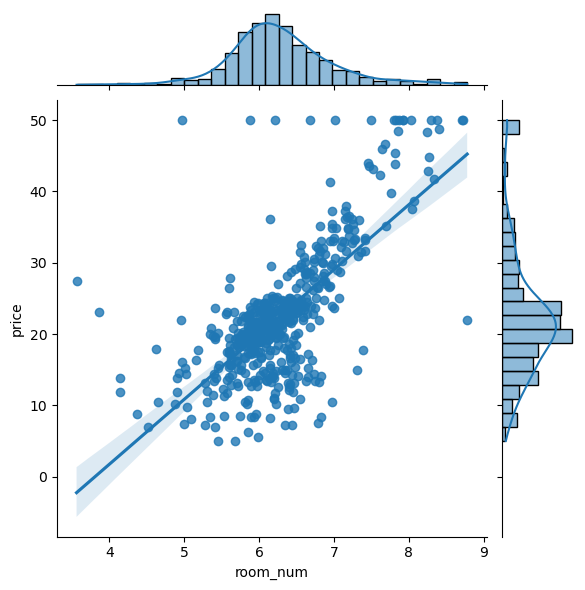

In [58]:
sns.jointplot(x=df['room_num'],y=df['price'], data=df, kind='reg')
plt.show()

## Multiple Linear Regression
* statsmodel
* sklearn

In [63]:
x_multi = df.drop('price', axis=1) # x= 1 drops columns whereas x=0 drops rows
x_multi

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,2.4775,0,0,1,0
502,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,2.2875,1,0,1,0
503,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,2.1675,0,0,0,0
504,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,2.3900,1,0,0,0


In [64]:
y_multi = df['price']
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [66]:
y_multi.describe(include='all')

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64

In [67]:
x_multi_cons = sn.add_constant(x_multi)
x_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [68]:
lm_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [69]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Sun, 19 May 2024   Prob (F-statistic):          4.19e-125
Time:                        19:08:44   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
lm3 = LinearRegression()

In [71]:
lm3.fit(x_multi, y_multi) # train the model

LinearRegression()

In [72]:
print(lm3.intercept_, lm3.coef_)

-6.498625198419951 [ 9.70998193e-03 -4.08746495e-02 -1.58973999e+01  4.01901676e+00
 -5.71475069e-03  1.00700068e+00 -5.77271243e-01  3.29221139e-01
  9.18675603e-02  1.61185504e-02 -1.21863952e+00  1.13151586e+00
  2.64086064e-01 -6.87555889e-01 -2.91318712e-01]


* Training set 
* Model is trained
* Test Set
* Test MSE

Expected test error = E(Bias) + E(Variance) + E <br>
E($) - Variance of error, irreducible <br>
E(Variance) - Amount by which predicted function will change if we change training dataset <br>
E(Bias) - Error due to approximation of complex relationship as a simpler model such as lnear model <br>


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=1)

In [77]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 15), (102, 15), (404,), (102,))

In [78]:
model = LinearRegression()

In [79]:
model.fit(x_train, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(x_test)

In [82]:
y_train_a = model.predict(x_train)

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score?

In [85]:
r2_score(y_test, y_pred)

0.7334347251335692

In [86]:
r2_score(y_train, y_train_a)

0.7130811029794184